In [28]:
from simulation_parser import parse_simulation_files
from output_generator import get_velocities
from pdf import data_to_pdf
from plot_generator import plot_multiple_pdf
import numpy as np

In [29]:
lower_limit = 0
upper_limit = None

In [30]:
input_files = {
    10 : {
        "static"  : "./ej2_2/static-N10.txt",
        "dynamic" : "./ej2_2/dynamic-N10.txt"
    },
    20 : {
        "static"  : "./ej2_2/static-N20.txt",
        "dynamic" : "./ej2_2/dynamic-N20.txt"
    },
    30 : {
        "static"  : "./ej2_2/static-N30.txt",
        "dynamic" : "./ej2_2/dynamic-N30.txt"
    }
}

In [31]:
limits = (lower_limit, upper_limit)

In [32]:
sim_infos = dict()

for N in input_files.keys():
    sim_infos[N] = parse_simulation_files(input_files[N]["static"], input_files[N]["dynamic"])

In [33]:
velocities_init = dict()
velocities_stat = dict()

for N in sim_infos.keys():
    velocities_init[N] = get_velocities(sim_infos[N], (0, 1))
    velocities_stat[N] = get_velocities(sim_infos[N], limits)
    velocities_init[N] = np.reshape(velocities_init[N], velocities_init[N].size)
    velocities_stat[N] = np.reshape(velocities_stat[N], velocities_stat[N].size)

In [34]:
pdf_init         = dict()
values_init      = dict()
class_width_init = dict()

pdf_stat         = dict()
values_stat      = dict()
class_width_stat = dict() 

for N in input_files.keys():
    pdf_init[N], values_init[N], class_width_init[N] = data_to_pdf(velocities_init[N], (9, 12))
    pdf_stat[N], values_stat[N], class_width_stat[N] = data_to_pdf(velocities_stat[N], (9, 12))

In [35]:
print("init")
for N in pdf_init.keys():
    print(N, "(area):", np.sum(pdf_init[N] * class_width_init[N]))
print()
print("stat")
for N in pdf_stat.keys():
    print(N, "(area):", np.sum(pdf_stat[N] * class_width_stat[N]))

init
10 (area): 1.0
20 (area): 1.0
30 (area): 1.0

stat
10 (area): 1.0
20 (area): 0.9999999999999999
30 (area): 0.9999999999999999


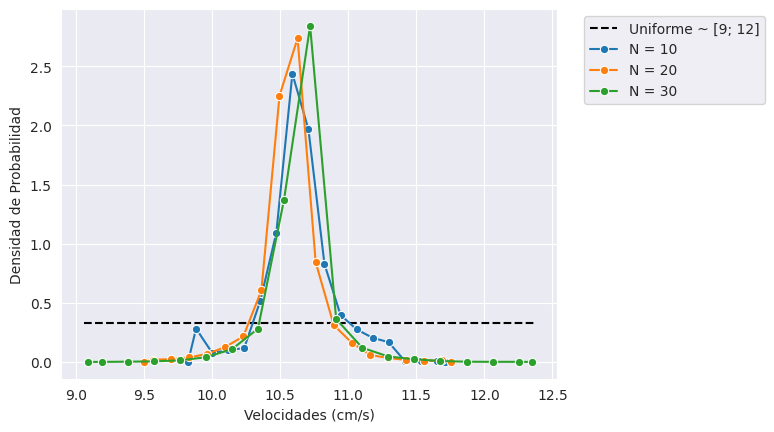

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
pdf_uniform = 1 / (12 - 9)
plt.plot([9.06,12.37], [pdf_uniform, pdf_uniform], linestyle="--", color="black", label="Uniforme ~ [9; 12]")
plot_multiple_pdf(list(values_stat.values()), list(pdf_stat.values()), ["N = " + str(N) for N in pdf_stat.keys()])